#                               Regression Modeling Case Study 

This case study is based on developing a machine learning model  to predict the number of bike rentals on a given day, as well as to provide insights into the factors that contribute to bike rental demand. 

# Imports and Data Check

In [74]:
#Importing libraries

# importing libraries
import numpy             as np                       # mathematical essentials
import pandas            as pd                       # data science essentials
import sklearn.linear_model                          # linear models
from sklearn.model_selection import train_test_split # train/test split
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output

# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
modeling_data = './datasets/train.xlsx'



# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



testing_data = "./datasets/test.xlsx"

#calling df_test
df_test = pd.read_excel(io            = testing_data,
                        sheet_name    ="data",
                        header        =0,
                        index_col     ="ID")

In [75]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [76]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

In [77]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_full.shape[0]}
Features (columns) : {df_full.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 2184
Features (columns) : 13



In [78]:
#setting response varaible as y

y_variable = 'RENTALS'

#  Data Preparation¶

##  Exploratory Data Analysis (EDA)¶

In [79]:
df_final=df_full.copy()

In [80]:
## Descriptive statistics

df_final.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.000000,2184.000000,2184.000000,2108.000000,2117.000000,2184.000000,2184.000000,2078.000000,1638.000000
mean,57.389652,59.228480,3.344780,9.646964,42.036089,0.004858,0.002015,0.547161,828.153846
std,12.861669,18.686445,2.071144,3.492413,13.997667,0.037354,0.018550,0.810564,657.599846
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,44.000000,1.800000,7.400000,33.400000,0.000000,0.000000,0.000000,241.500000
50%,57.000000,59.000000,2.900000,11.700000,41.900000,0.000000,0.000000,0.000000,761.500000
75%,68.000000,74.000000,4.500000,12.400000,51.600000,0.000000,0.000000,0.980000,1203.750000
max,91.000000,97.000000,12.800000,12.400000,75.000000,0.710000,0.300000,3.180000,3303.000000


Descriptive statistics summary:

    Temperature, humidity and wind speed appear to have a wide range of values.
    However, Rainfall, Snowfall and Solar Radiation feature zeros in the 25th, 50th and 75th percentile

In [81]:
#checking for data types and null values

df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


##  Base Modeling:

In [82]:
#checking correlation for target variable"RENTALS"

numerical_df = df_final.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation matrix


correlation_matrix.loc[ : , 'RENTALS'].round(decimals = 2).sort_values(ascending = False)

RENTALS                   1.00
Temperature(F)            0.32
SolarRadiation(MJ/m2)     0.21
Wind speed (mph)          0.19
DewPointTemperature(F)    0.03
Visibility(miles)         0.00
Snowfall(in)             -0.09
Rainfall(in)             -0.15
Humidity(%)              -0.40
Name: RENTALS, dtype: float64

Bike rentals are being predicted. To do so, the correlational effects of numerical values are observed. 
Temperature is seen to have the highest positive correlation, followed by solar radiation 
and wind speed having moderate positive correlation and Dew point has lowest positivecorelation.
Humidity has the highest negative correlation, followed by rainfall and snowfall having low negative correlation and
Visibility does not have any relation.
From this it can be concluded that Humidity and Temperature have a significant effect on Bike rentals. 







Creating scatterplot for the fetures having correlation with "RENTALS"

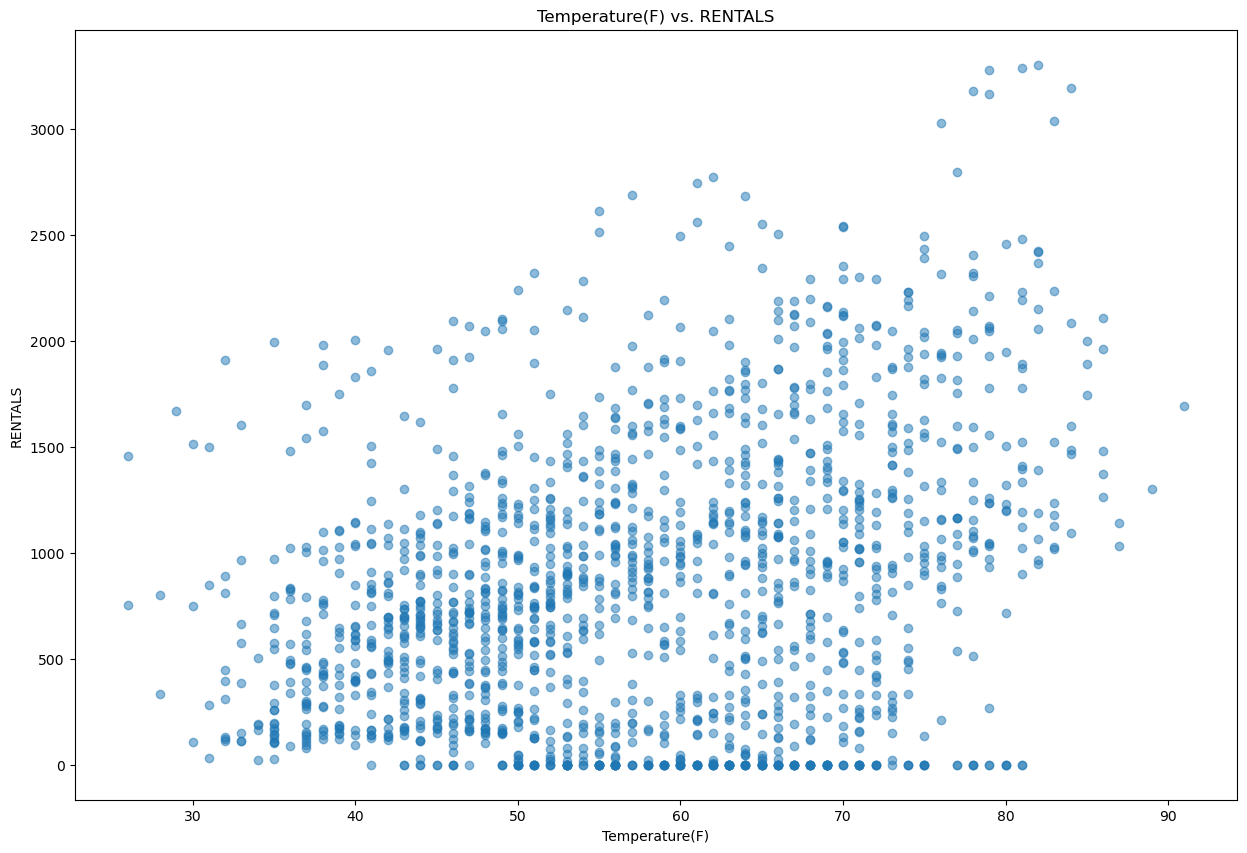

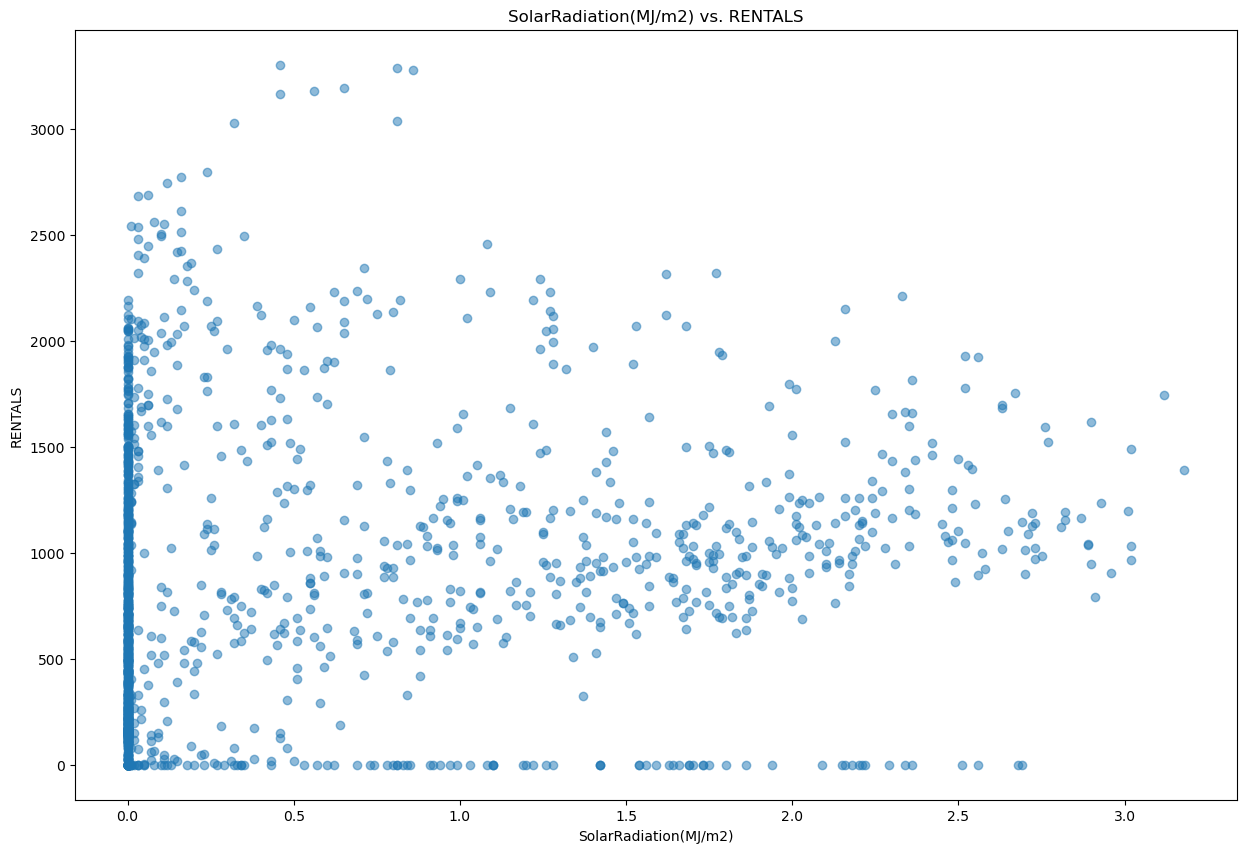

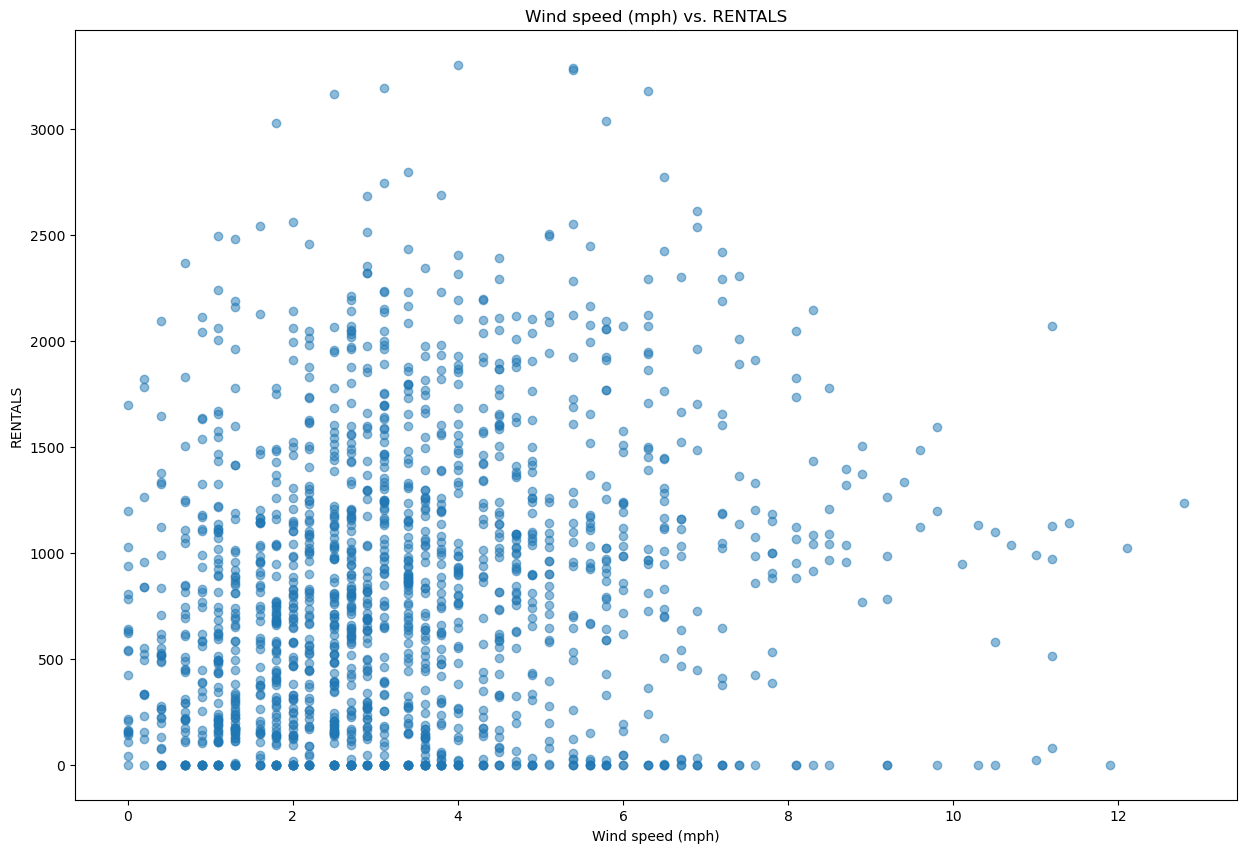

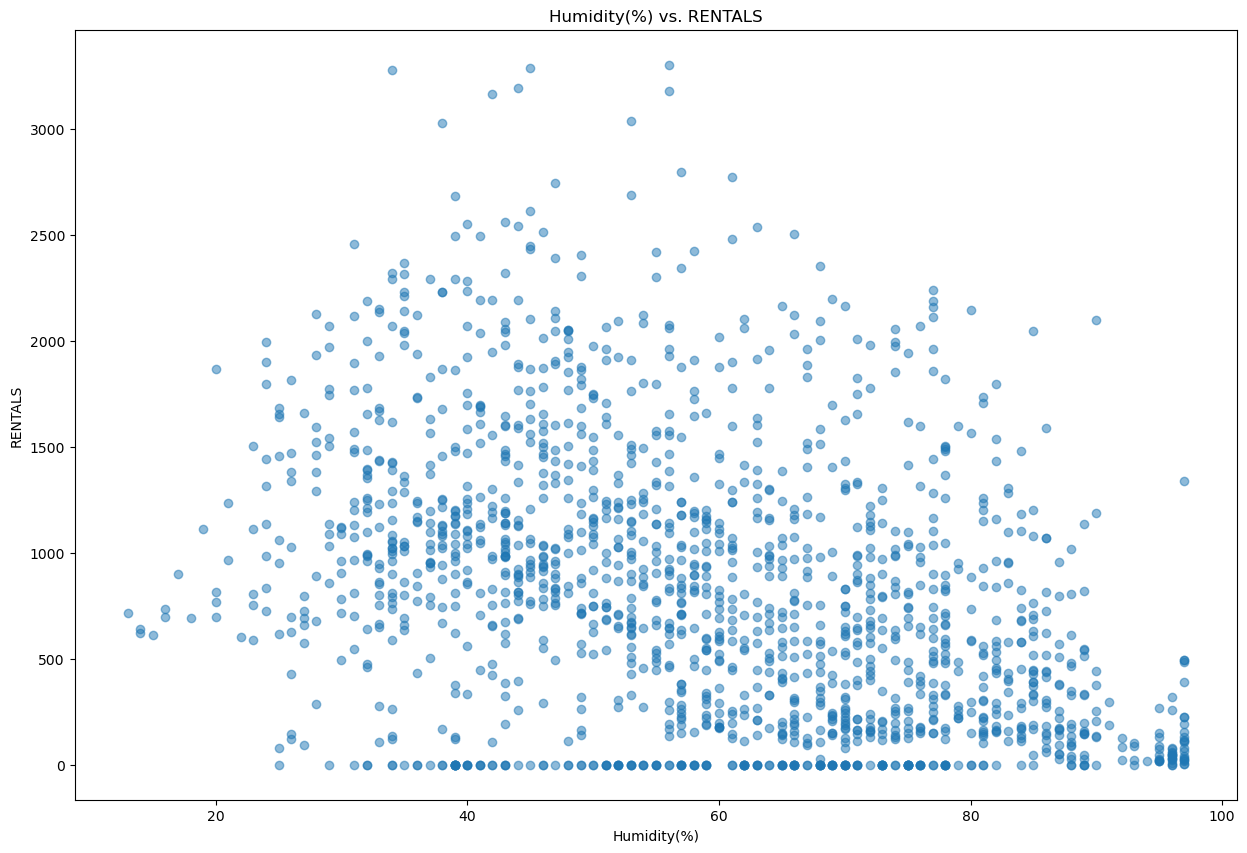

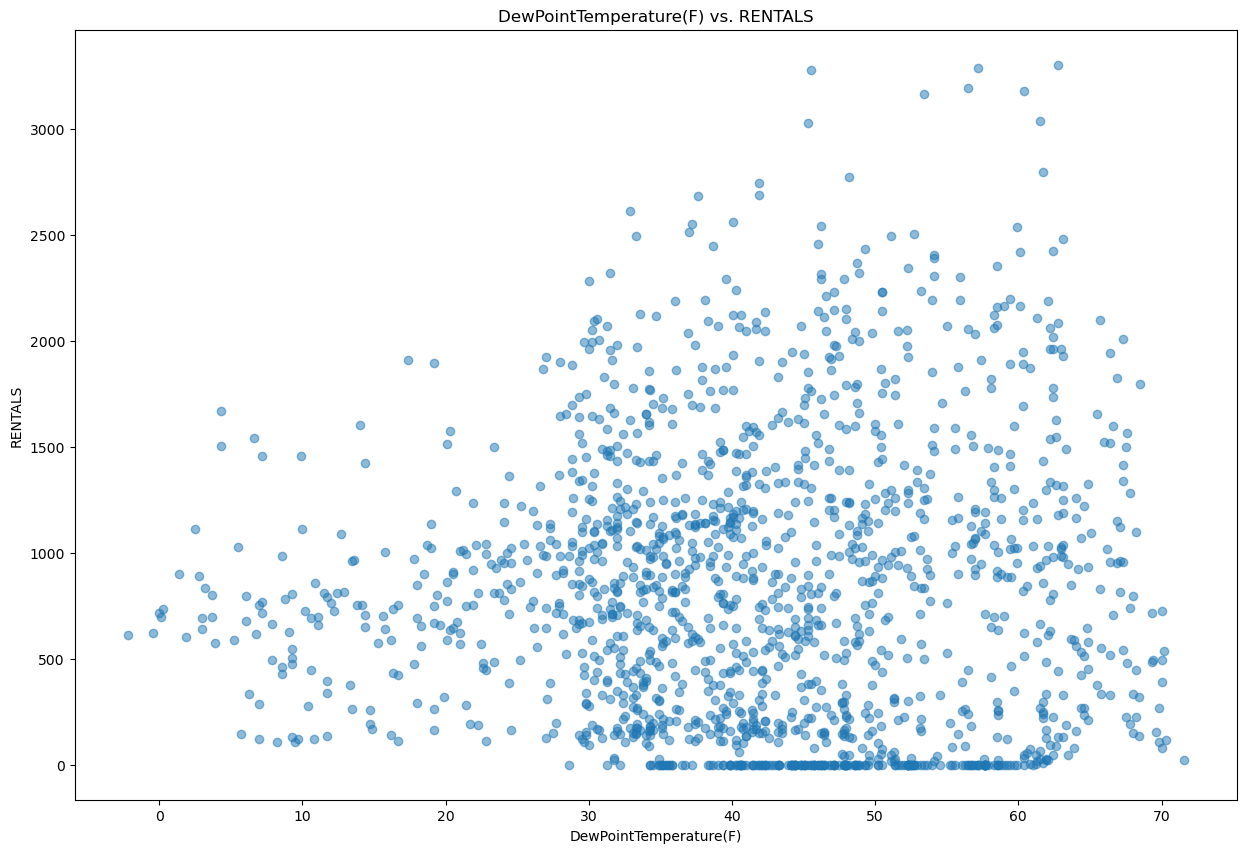

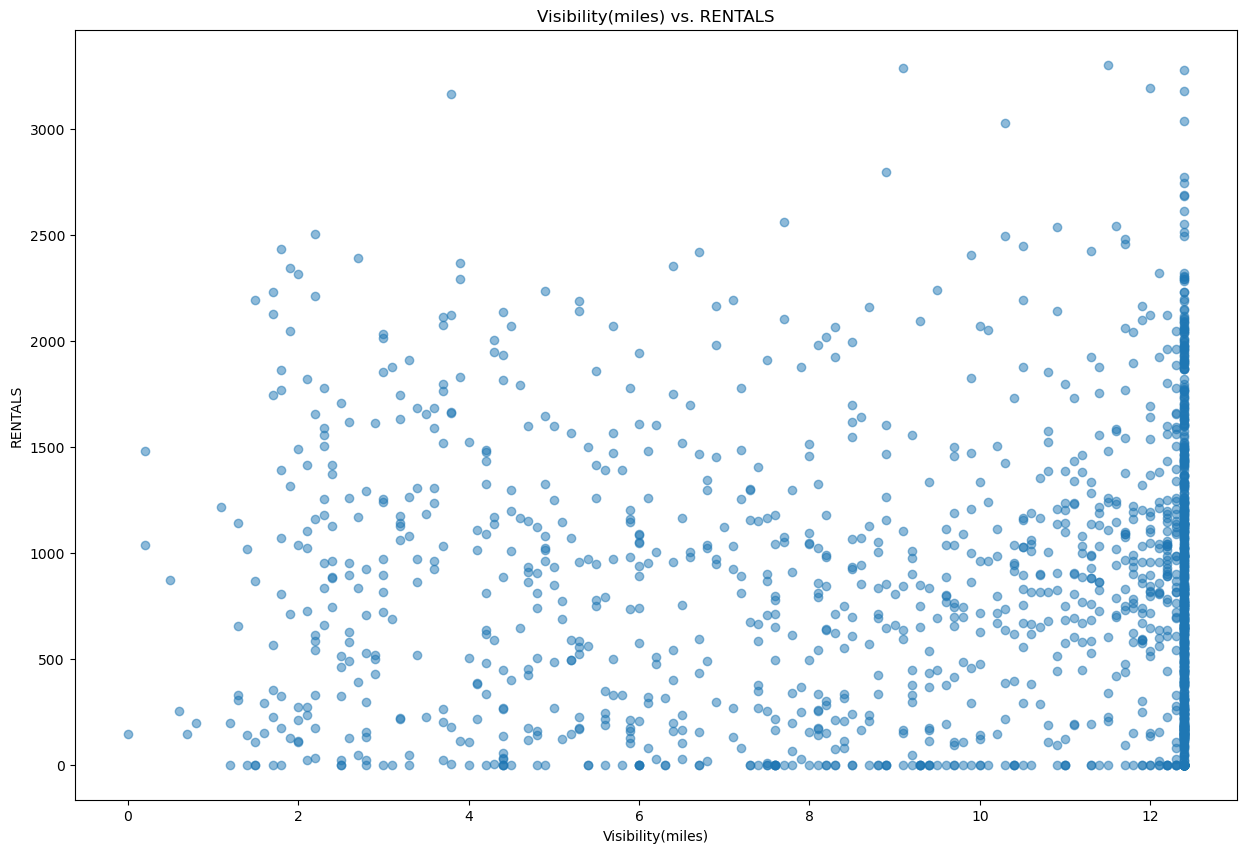

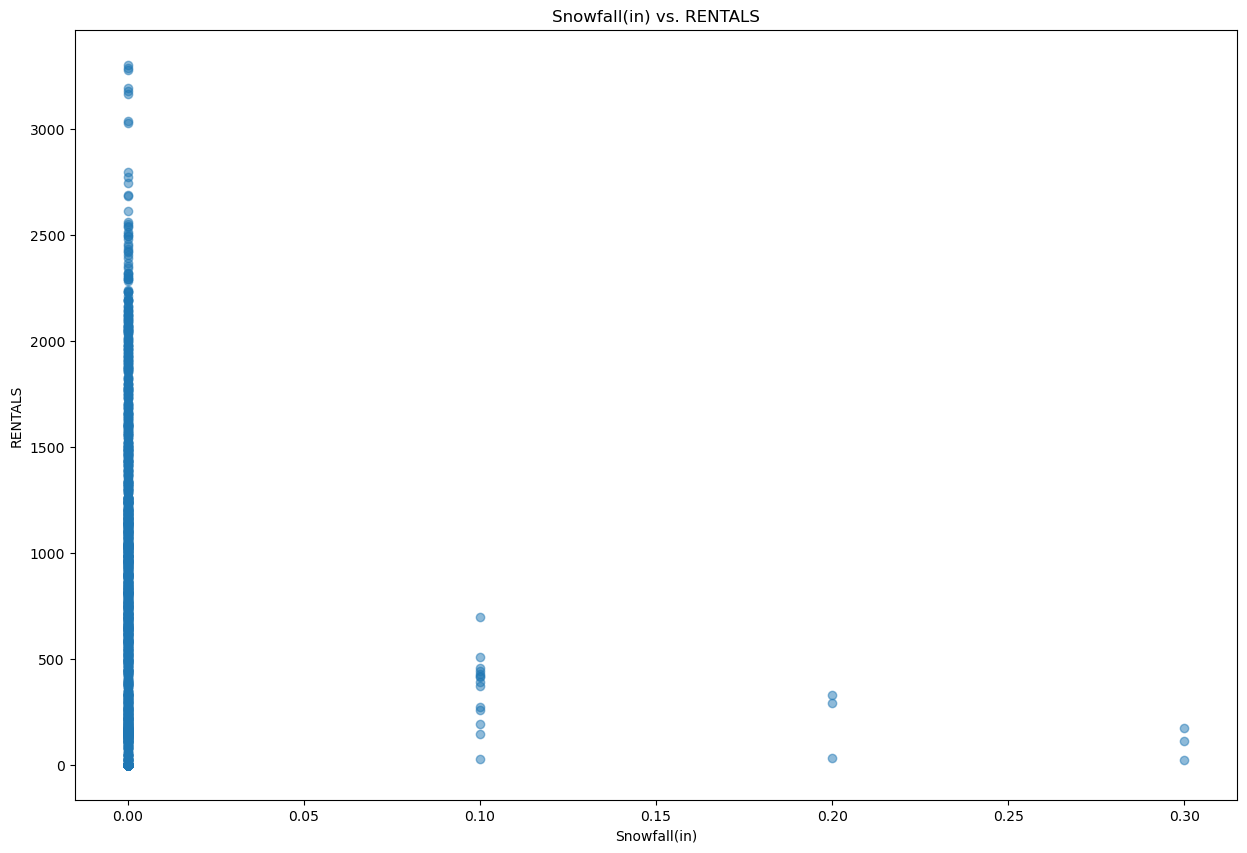

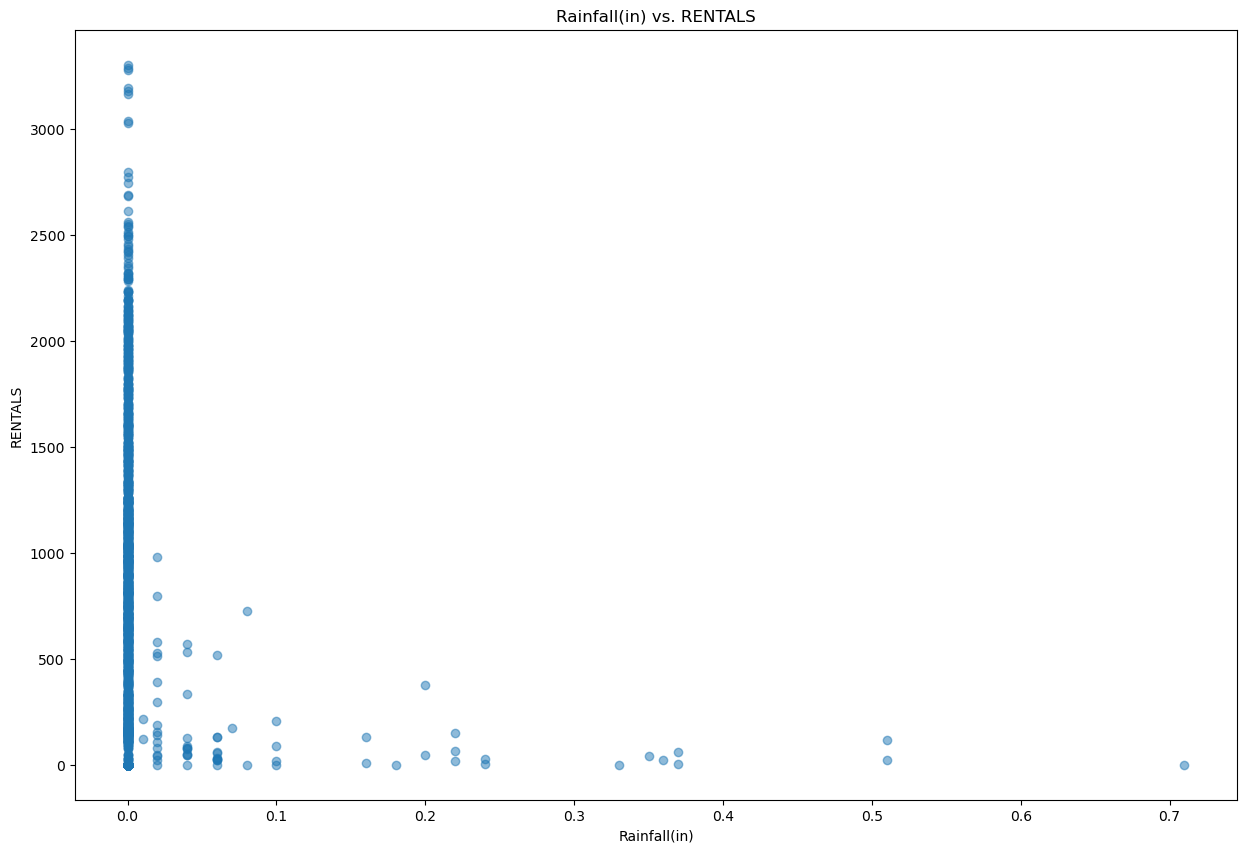

In [84]:
#Creating scatterplot for the fetures having correlation with "RENTALS"
target_variable = 'RENTALS'
feature_columns = ['Temperature(F)', 'SolarRadiation(MJ/m2)', 'Wind speed (mph)', 'Humidity(%)','DewPointTemperature(F)',
                'Visibility(miles)','Snowfall(in)','Rainfall(in)']

# scatter plots for each feature against the target variable
for feature in feature_columns:
    plt.figure(figsize=(15, 10))
    plt.scatter(df_final[feature], df_final[target_variable], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f'{feature} vs. {target_variable}')
    plt.show()

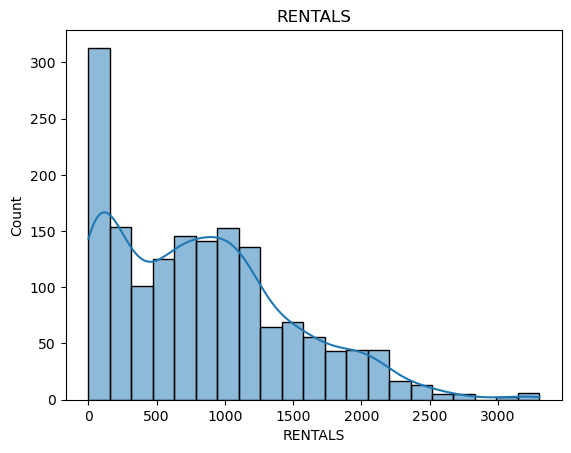

In [13]:
sns.histplot(x = 'RENTALS',
            data = df_final,
            kde = True)


# title and labels
plt.title (label  = 'RENTALS')
plt.xlabel(xlabel = 'RENTALS')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

In [85]:
#Checking  R2 value for the columns given with the Rentals:

import statsmodels.formula.api as smf

lm_best = smf.ols(formula = """RENTALS ~ 
                                    
                                        Q("Temperature(F)") +
                                        Q("Humidity(%)")+ 
                                         Q("SolarRadiation(MJ/m2)")
                                        
                                          
                                          """,
                  data = df_final)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           6.82e-94
Time:                        22:53:00   Log-Likelihood:                -12095.
No. Observations:                1558   AIC:                         2.420e+04
Df Residuals:                    1554   BIC:                         2.422e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

From the given features, temperature, Humidity and Solar Radiation are used for building the base models. 
R-squared values are less(0.254) and all P values are < 0.05. 
To increase the R squared values, further features have to be added to build a better base model

##   Missing Value Analysis and Imputation¶

In [86]:
# Check for missing values
df_final.isnull().sum()

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

Visibility, Dew point and Solar Radiation have missing values which have to be handled to perform accurate analysis.

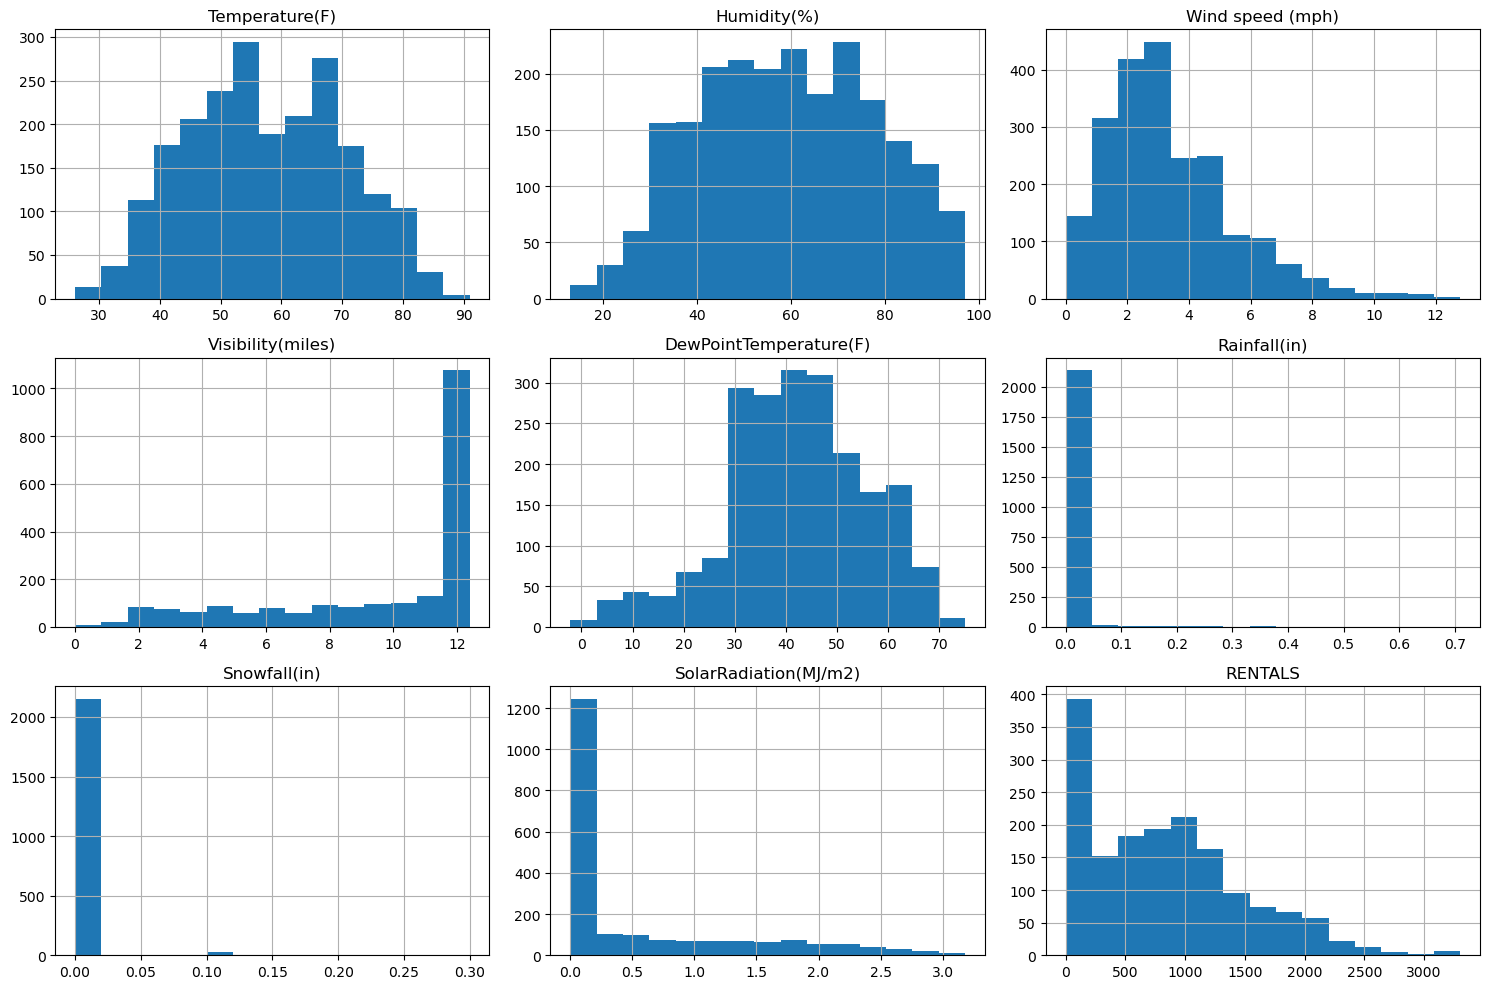

In [87]:
# Histograms for numerical features

df_final.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [88]:
df_final_cols = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)',
                  'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'RENTALS']

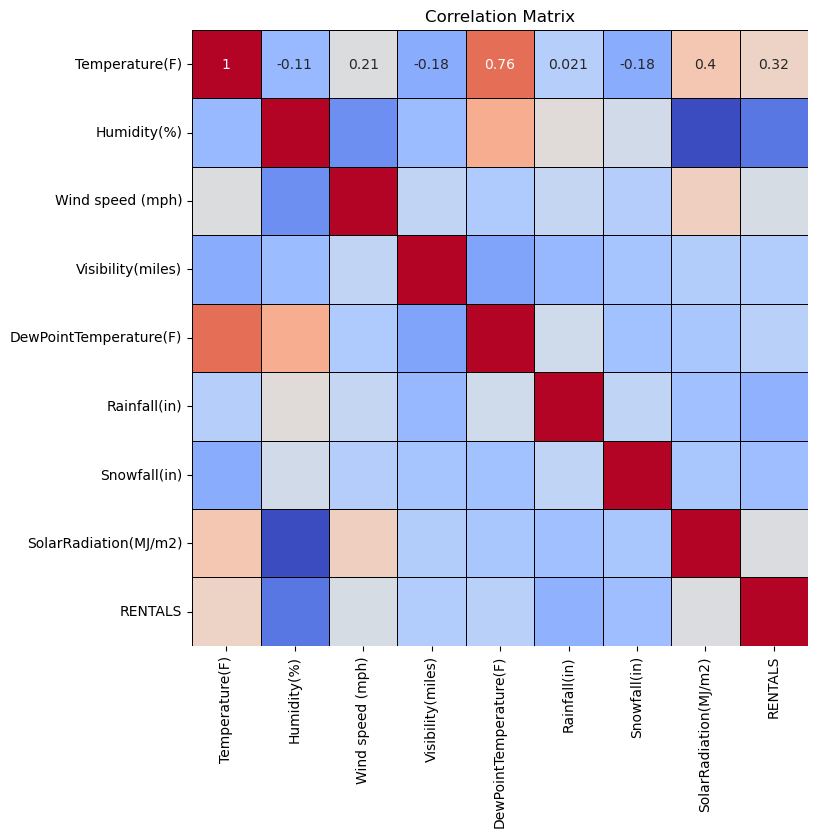

In [89]:
# Correlation matrix
correlation_matrix = df_final[df_final_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black', 
            linewidths = 0.5)

plt.title("Correlation Matrix")
plt.show()

In [90]:
#missing value imputations in "Dew point","Visibility","Solar Radiations" using median

median_dewPoint = df_final['DewPointTemperature(F)'].median()
df_final['DewPointTemperature(F)'].fillna(value = median_dewPoint,
                           inplace = True)

median_visibility = df_final['Visibility(miles)'].median()
df_final['Visibility(miles)'].fillna(value = median_visibility,
                           inplace = True)

median_solar = df_final['SolarRadiation(MJ/m2)'].median()
df_final['SolarRadiation(MJ/m2)'].fillna(value = median_solar,
                           inplace = True)

#checking weather values have been imputed:
df_final.isnull().sum()

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)           0
DewPointTemperature(F)      0
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)       0
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

For the mentioned 3 features, the distribution is skewed. 
In order to impute mean values, we need a normal distribution. 
So it is better to impute the median values for skewed distributions 



##  Feature Engineering

In [91]:
#Separating hour from Datehour and creating Hour features

df_final["DateHour"]=pd.to_datetime(df_final["DateHour"],format='mixed')

df_final["Hour"]=df_final["DateHour"].dt.strftime("%H")
# changing datatypes to int

df_final["Hour"]=df_final["Hour"].astype(int)

#Extract day of the week and rename column
df_final['DayOfWeek'] = df_final['DateHour'].dt.strftime('%A')  # Extract full day name


# Extract month
df_final['month'] = df_final['DateHour'].dt.month


In [92]:
# creating newcolumn with season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
    
    
# Extract season based on the month using the custom function
df_final['season'] = df_final['DateHour'].dt.month.apply(get_season)    

Looking at the "Hour Feature" is like spotting when things get busy or calm during a day. This is super helpful for figuring out the regular rush hours or quiet moments.

The "DayOfWeek Feature" helps us see how things change from the busy weekdays to the chill weekends. It’s like noticing when the pace picks up or slows down each week, showing us the weekly routine.

When we talk about "Month and Season Features," it's about understanding how different times of the year affect what people do, how businesses perform, or even how much energy we use. This matters a lot for shops that need to stock up for holiday seasons, or for figuring out when people use more heating or cooling at home, depending on the season.

For rentals, day, hour and season are important to review to understand trends.
For this purpose, we have extracted the individual pointers seperately from DateHour column.



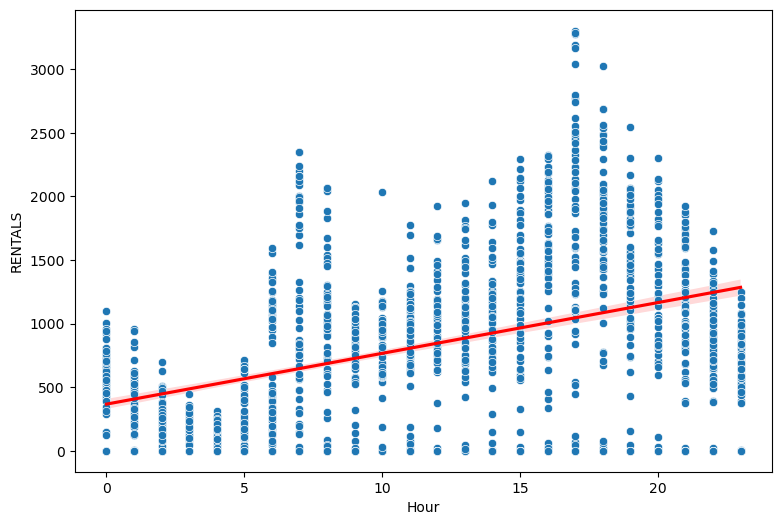

In [93]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.regplot(x='Hour', y='RENTALS', data=df_final, scatter=False, color='red')
sns.scatterplot(x    = 'Hour',
                y    = 'RENTALS',
                data = df_final)


# SHOWing the results
plt.show()

In [94]:
#creating features "Peakhour" by selecting a hours (range of morning 4-10,evening 4-10)set to be 1 
#and others are set to be 0 
df_final["Peakhour"]=df_final["Hour"].replace(to_replace=range(6,8),value=1)
df_final["Peakhour"]=df_final["Hour"].replace(to_replace=range(14,20),value=1)
df_final["Peakhour"]=df_final["Peakhour"].apply(lambda x: 0 if x != 1 else x)


When analysing rental rates based on hours, some hours tend to have higher rental rates. Digging deeper into this, peak hours where identified and used a seperate feature.

'peak hours', which are typically busier or more active times of the day. Specifically, it's designed to mark early morning hours (6 to 8) and late afternoon to evening hours (14 to 20) as peak times by assigning them a value of 1. However, due to the way the code is written, only the hours from 14 to 20 are successfully tagged as peak hours. The rest of the hours in a day are labeled as non-peak hours with a value of 0. 

In [95]:
#creating a comfort weather as "Temperature and humdity"have a good correlation with rentals, its good to combine these two and have 
#predictions for comfort weather

df_final['Comfortweather']= (
    0.6 * (df_final['Temperature(F)'] - df_final['Temperature(F)'].min()) / (df_final['Temperature(F)'].max() - df_final['Temperature(F)'].min()) +
    0.4 * (df_final['Humidity(%)'] - df_final['Humidity(%)'].min()) / (df_final['Humidity(%)'].max() - df_final['Humidity(%)'].min()) 
)

The resulting 'Comfortweather' score aims to provide a single metric that reflects how comfortable the weather feels, based on a balance of warmth and moisture in the air. By doing so, it simplifies the complex interplay between temperature and humidity into a more digestible form, offering a straightforward way to assess weather comfort at a glance.

In [96]:
#creating a "weekend column and assigning 1 for having weekend"

df_final['is_weekend'] = df_final['DateHour'].dt.dayofweek.isin([5, 6,7 ]).astype(int)

A new column Weekend is created which contains Friday, Saturday and Sunday since these days have higher volume of rentals.


In [97]:
# Precipitation binary indicator
df_final['precipitation'] = ((df_final['Rainfall(in)'] > 0) | (df_final['Snowfall(in)'] > 0)).astype(int)

The 'precipitation' feature is designed to indicate whether there has been any rain or snow. It does this by checking if the recorded inches of rainfall or snowfall are greater than zero. If either condition is met (meaning there's either rain or snow), the 'precipitation' value is set to 1; otherwise, it's 0. This creates a simple, binary indicator that's useful for quickly identifying days with precipitation events without needing to parse specific amounts of rain or snow.

In [98]:
# Define a function to calculate apparent temperature
def calculate_apparent_temperature(row):
    # Convert temperature and dew point temperature to Celsius
    temperature_celsius = (row['Temperature(F)'] - 32) * 5/9
    dew_point_temperature_celsius = (row['DewPointTemperature(F)'] - 32) * 5/9
     # Convert wind speed to m/s
    wind_speed_mps = row['Wind speed (mph)'] * 0.44704
    # Calculate vapor pressure (e)
    e = (row['Humidity(%)'] / 100) * 6.11 * (10**(7.5 * dew_point_temperature_celsius / (237.7 + dew_point_temperature_celsius)))
    # Calculate apparent temperature (AT)
    
    AT = temperature_celsius + 0.33 * e - 0.70 * wind_speed_mps - 4.0
    return AT

# Apply the function to create a new column for apparent temperature
df_final['Feel_like_temp'] = df_final.apply(calculate_apparent_temperature, axis=1)

In [99]:
#Calculate Heat Index
def calculate_heat_index(temperature_fahrenheit, relative_humidity):
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -0.00683783
    c6 = -0.05481717
    c7 = 0.00122874
    c8 = 0.00085282
    c9 = -0.00000199
    temperature_celsius = (temperature_fahrenheit - 32) * 5/9
    heat_index =(c1 + (c2 * temperature_fahrenheit) + (c3 * relative_humidity) +
                (c4 * temperature_fahrenheit * relative_humidity) +
                (c5 * temperature_fahrenheit**2) +
                (c6 * relative_humidity**2) +
                (c7 * temperature_fahrenheit**2 * relative_humidity) +
                (c8 * temperature_fahrenheit * relative_humidity**2) +
                (c9 * temperature_fahrenheit**2 * relative_humidity**2))
    if temperature_fahrenheit < 80 or relative_humidity < 40:
        return max(temperature_celsius, heat_index)
    return heat_index

df_final['heat_index'] = df_final.apply(lambda row: calculate_heat_index(row['Temperature(F)'], row['Humidity(%)']), axis=1)


The "Heat Index" feature is a measure that combines air temperature and humidity to determine the human-perceived equivalent temperature, or how hot it feels. It's crucial for assessing heat stress in hot weather, particularly in health and safety guidelines to prevent heat-related illnesses.

The "Feels Like" temperature, often called "apparent temperature," takes into account temperature, humidity, and wind speed to estimate how the air temperature feels to the human skin. It's used to provide a more accurate representation of how outdoor conditions feel to people, which can differ significantly from the actual air temperature, especially in windy or highly humid conditions.

Both features are vital for weather forecasting, planning outdoor activities, and managing health risks associated with extreme temperatures.


Visulaizing scatter plot( New features vs Rentals)

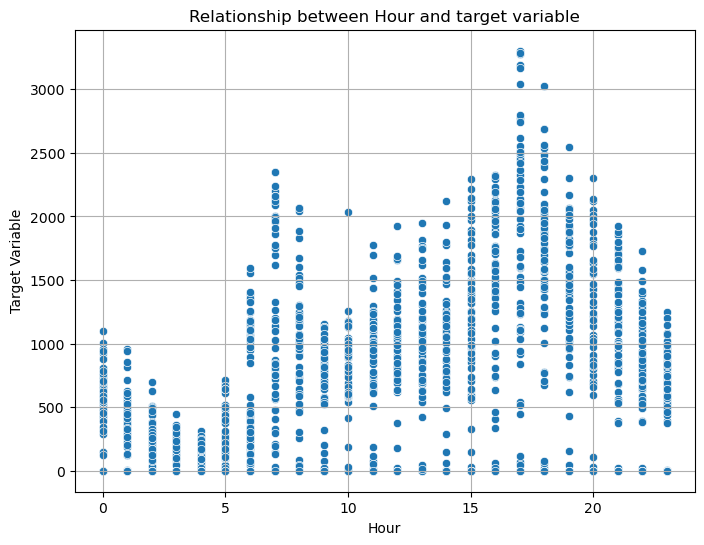

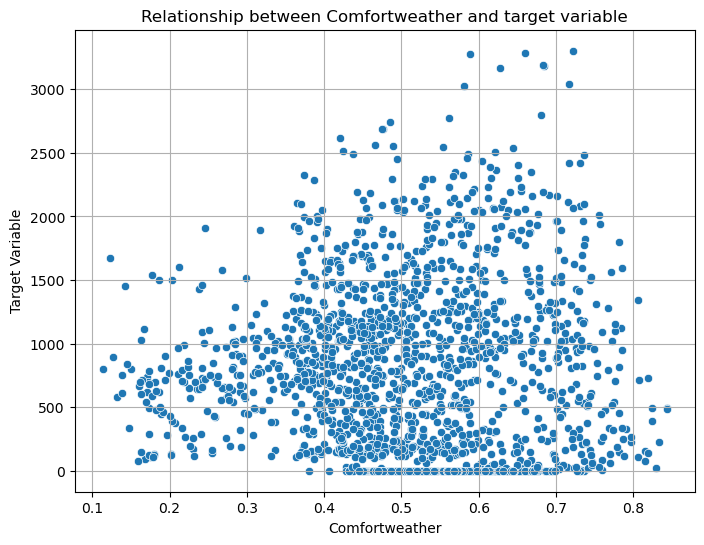

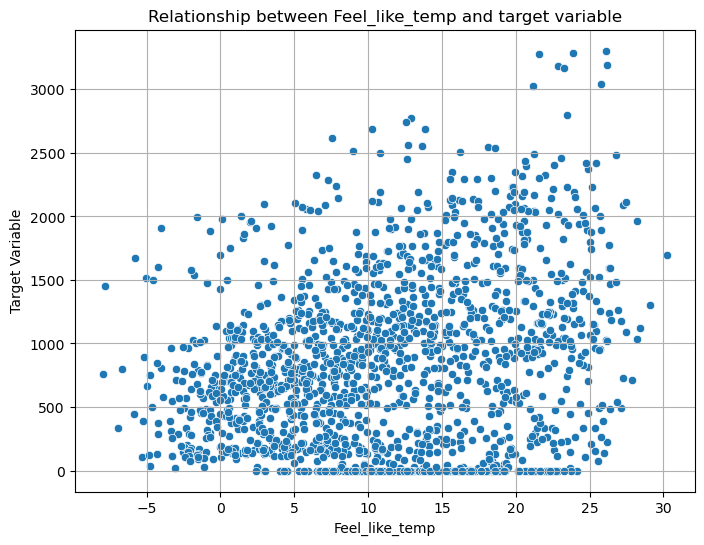

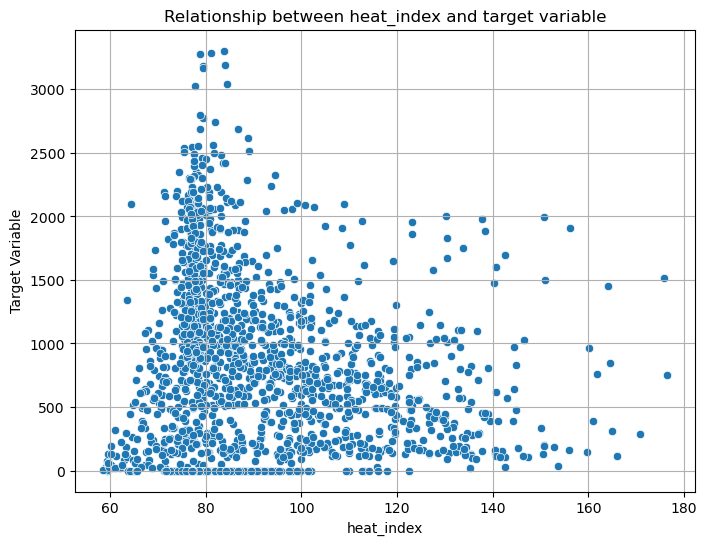

In [100]:
features = ["Hour","Comfortweather","Feel_like_temp","heat_index"]
# Loop through each feature
for feature in features:
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_final[feature], y=df_final["RENTALS"])
    plt.title(f"Relationship between {feature} and target variable")
    plt.xlabel(feature)
    plt.ylabel("Target Variable")
    plt.grid(True)
    plt.show()

In [101]:
df_final.head()

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set,Hour,DayOfWeek,month,season,Peakhour,Comfortweather,is_weekend,precipitation,Feel_like_temp,heat_index
ID,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle,5,Saturday,10,Fall,0,0.563810,1,0,9.851704,85.742269
mb_1330,2023-10-26 08:59:53.355,51,53,2.2,11.7,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle,8,Thursday,10,Fall,0,0.421245,0,0,7.081922,97.457114
mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle,21,Saturday,9,Fall,0,0.448352,1,0,9.845460,88.096873
mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle,14,Tuesday,12,Winter,1,0.487399,0,0,14.330914,76.398087
mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle,12,Monday,10,Fall,0,0.282564,0,0,6.939118,74.584799


<Axes: xlabel='Holiday', ylabel='RENTALS'>

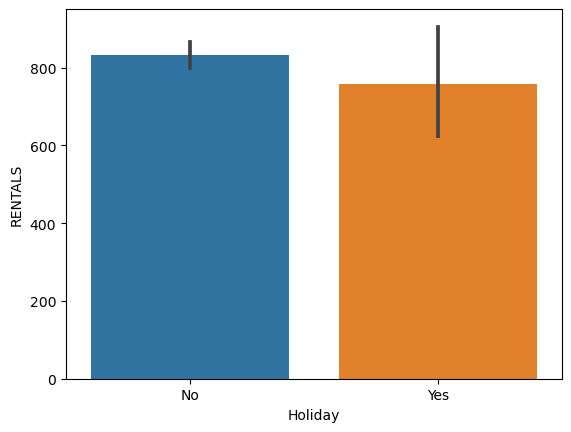

In [102]:
#Visulizing boxplot of categorical features
#Holiday
sns.barplot(x='Holiday',y='RENTALS',data=df_final)

<Axes: xlabel='FunctioningDay', ylabel='RENTALS'>

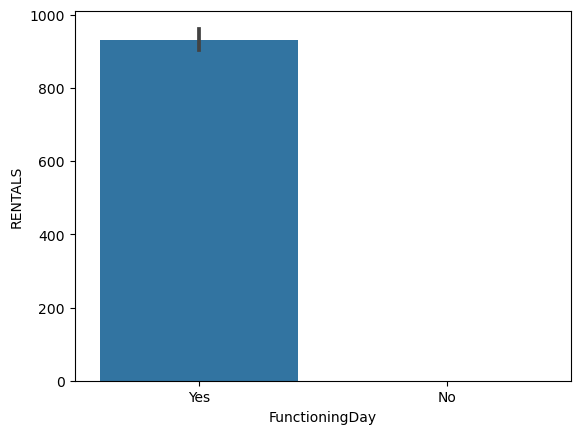

In [103]:
#Functioning day

sns.barplot(x='FunctioningDay',y='RENTALS',data=df_final)

<Axes: xlabel='season', ylabel='RENTALS'>

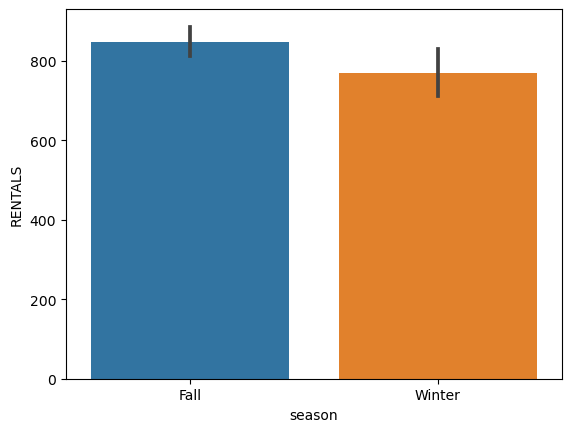

In [104]:
# Analysing the demand in various seasons
sns.barplot(x='season',y='RENTALS',data=df_final)

From the above visualization, the bike rental rates are higher in fall as compared to winter. 

<Axes: xlabel='month', ylabel='RENTALS'>

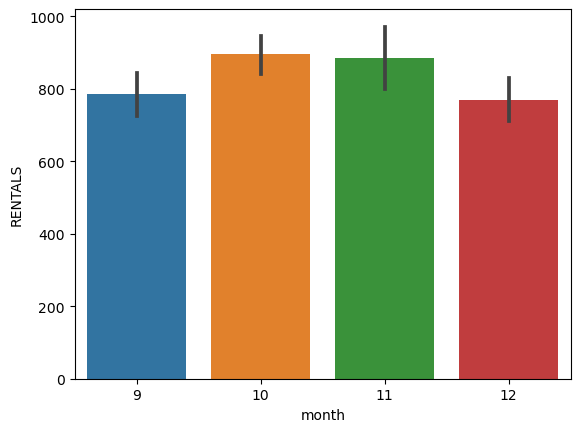

In [105]:
sns.barplot(x='month',y='RENTALS',data=df_final)

<Axes: xlabel='is_weekend', ylabel='RENTALS'>

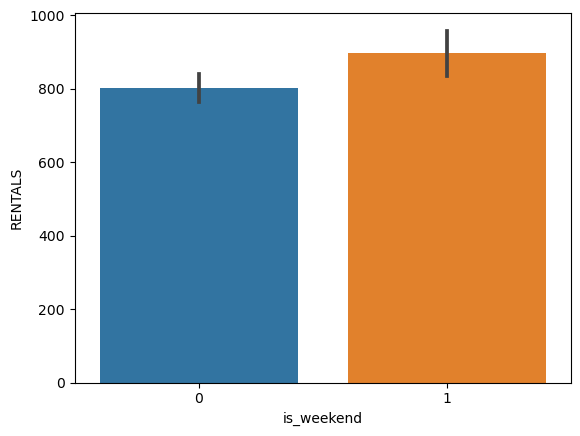

In [106]:
sns.barplot(x="is_weekend",y='RENTALS',data=df_final)

<Axes: xlabel='precipitation', ylabel='RENTALS'>

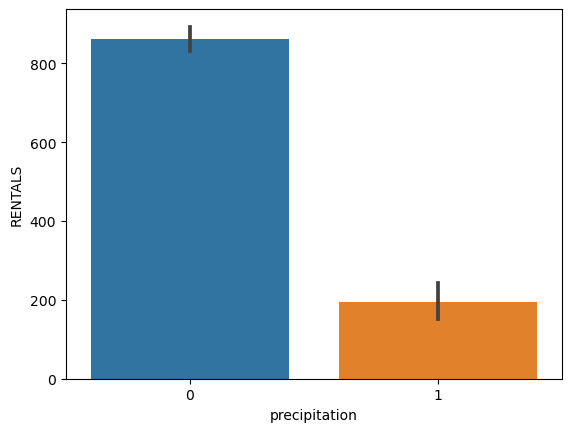

In [107]:
sns.barplot(x="precipitation",y='RENTALS',data=df_final)

In [108]:
# Removing unwanted columns from analysis
df_final.drop(columns=['DayOfWeek','month'],
             axis=1,
             inplace=True)

In [109]:
# Defining categorical_features
categorical_features = ['Holiday', 'FunctioningDay','season','Peakhour','is_weekend','precipitation']

# Converting categorical features to 'object' type for proper handling in analysis
df_final[categorical_features] = df_final[categorical_features].astype(object)

In [110]:
# Converting categorical columns into dummy variables
df_final_col_dummies = pd.get_dummies(df_final[categorical_features],drop_first=True)


df_final = df_final.drop(categorical_features, axis = 1)
df_final = pd.concat([df_final, df_final_col_dummies], axis = 1)


In [111]:
df_final.drop(columns='DateHour',
             axis=1,
             inplace=True)

In [112]:
df_final.head()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,set,Hour,Comfortweather,Feel_like_temp,heat_index,Holiday_Yes,FunctioningDay_Yes,season_Winter,Peakhour_1,is_weekend_1,precipitation_1
ID,,,,,,,,,,,,,,,,,,,,
mb_1039,52,81,0.4,2.9,46.4,0.0,0.0,0.00,519.0,Not Kaggle,5,0.563810,9.851704,85.742269,False,True,False,False,True,False
mb_1330,51,53,2.2,11.7,35.2,0.0,0.0,1.01,1251.0,Not Kaggle,8,0.421245,7.081922,97.457114,False,True,False,False,False,False
mb_551,56,49,2.5,3.4,38.8,0.0,0.0,0.00,1685.0,Not Kaggle,21,0.448352,9.845460,88.096873,False,True,False,False,True,False
mb_2103,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0.0,Not Kaggle,14,0.487399,14.330914,76.398087,False,False,True,True,False,False
mb_1430,53,20,2.9,10.8,12.9,0.0,0.0,1.96,814.0,Not Kaggle,12,0.282564,6.939118,74.584799,False,True,False,False,False,False


#  Data Partitioning¶

##   Separating the Kaggle Data

In [113]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_final[ df_final['set'] == 'Kaggle' ].copy()


# dataset for model building
df_final_new = df_final[ df_final['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df_final_new.drop(labels = 'set',
        axis = 1,
        inplace = True)

##  Train-Test Split¶

In [114]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Split data into features and target
X = df_final_new.drop(['RENTALS'],axis=1)
y = df_final_new["RENTALS"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
#Adding features for best R2 value and pvalue <0.05

import statsmodels.formula.api as smf

lm_full = smf.ols(formula = """RENTALS ~ Q("Temperature(F)") +
                                          Q("Humidity(%)") +
                                            Q("Wind speed (mph)") +
                                            Q("DewPointTemperature(F)") +
                                            Q('SolarRadiation(MJ/m2)')+
                                            Hour +
                                            Comfortweather +
                                            Feel_like_temp +
                                            heat_index+ 
                                            Holiday_Yes+
                                            FunctioningDay_Yes+
                                            Peakhour_1+
                                            precipitation_1
                                           
                                        
                                            """,
                                data = df_final)

                        

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RENTALS   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          1.98e-322
Time:                        23:00:20   Log-Likelihood:                -12179.
No. Observations:                1638   AIC:                         2.438e+04
Df Residuals:                    1625   BIC:                         2.445e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -4338.5593    437.497     -9.917      0.000   -5196.677   -3480.441
Holiday_Yes[T.True]          -176.7754     46.857     -3.773      0.000    -268.683     -84.868
FunctioningDay_Yes[T.True]   1013.8979     33.201     30.538      0.000     948.776    1079.020
Peakhour_1[T.True]            241.5488     25.280      9.555      0.000     191.965     291.133
precipitation_1[T.True]      -352.8556     53.978     -6.537      0.000    -458.729    -246.982
Q("Temperature(F)")            81.6056      9.867      8.270      0.000      62.251     100.960
Q("Humidity(%)")               -8.5864      1.393     -6.166      0.000     -11.318      -5.855
Q("Wind speed (mph)")         -40.4094      8.075     -5.004      0.000     -56.248     -24.571
Q("DewPointTemperature(F)")     6.9198      3.065      2.258      0.024       0.908      12.932
Q('SolarRadiation(MJ/m2)')    -59.2293     18.698     -3.168      0.002     -95.903     -22.555
Hour                           26.7395      1.637     16.337      0.000      23.529      29.950
Comfortweather               1310.5441    132.172      9.915      0.000    1051.299    1569.789
Feel_like_temp               -128.5169     18.965     -6.777      0.000    -165.715     -91.319
heat_index                      4.2257      0.929      4.548      0.000       2.403       6.048
==============================================================================
Omnibus:                      278.024   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.953
Skew:                           1.055   Prob(JB):                    2.73e-109
Kurtosis:                       4.694   Cond. No.                     4.74e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Initially there was a lower R squared value. After introducing relevant features, the current R squared value has increased to 0.611 and P value 
is < 0.05. Hence the model has been improved and is ready for training and testing. 

In [116]:
# Check for missing values trainig data
df_final_new.isnull().sum()

Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
RENTALS                   0
Hour                      0
Comfortweather            0
Feel_like_temp            0
heat_index                0
Holiday_Yes               0
FunctioningDay_Yes        0
season_Winter             0
Peakhour_1                0
is_weekend_1              0
precipitation_1           0
dtype: int64

In [117]:
# Check for missing values trainig data
df_final_new.isnull().sum()

Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
RENTALS                   0
Hour                      0
Comfortweather            0
Feel_like_temp            0
heat_index                0
Holiday_Yes               0
FunctioningDay_Yes        0
season_Winter             0
Peakhour_1                0
is_weekend_1              0
precipitation_1           0
dtype: int64

In [118]:
# Split data into features and target only selected features
X = df_final_new[['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'DewPointTemperature(F)','SolarRadiation(MJ/m2)', 'Hour', 'Comfortweather','Feel_like_temp', 'heat_index','Holiday_Yes',
                'FunctioningDay_Yes','Peakhour_1','precipitation_1']]
                        
y = df_final_new["RENTALS"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df_final_new.shape[0]}
Features  (Columns): {df_final_new.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {X_train_scaled.shape[0]}
Features  (Columns): {X_train_scaled.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {X_test_scaled.shape[0]}
Features  (Columns): {X_test_scaled.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 19


Training Data (X-side)
----------------------
Observations (Rows): 1310
Features  (Columns): 13


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1310


Testing Data (X-side)
---------------------
Observations (Rows): 328
Features  (Columns): 13


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 328


#  Candidate Modeling

In [119]:
# Initializing a list to store results of candidate models
candidate_model_result = []

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
candidate_model_result.append(['Linear Regression',np.sqrt(mean_squared_error(y_test, y_pred_lr)),r2_score(y_test, y_pred_lr)])

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
print('Lasso Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
candidate_model_result.append(['Lasso Regression',np.sqrt(mean_squared_error(y_test, y_pred_lasso)),r2_score(y_test, y_pred_lasso)])

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridre = ridge_model.predict(X_test_scaled)
print('Ridge Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridre)))
candidate_model_result.append(['Ridge Regression',np.sqrt(mean_squared_error(y_test, y_pred_ridre)),r2_score(y_test, y_pred_ridre)])

# Elastic Net Regression
elastic_net_model = SGDRegressor(loss='huber', penalty='elasticnet', alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_net_model.predict(X_test_scaled)
print('Elastic Net Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_elastic)))
candidate_model_result.append(['Elastic Net Regression',np.sqrt(mean_squared_error(y_test, y_pred_elastic)),r2_score(y_test, y_pred_elastic)])

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print('K-Nearest Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_knn)))
candidate_model_result.append(['K-Nearest Regression',np.sqrt(mean_squared_error(y_test, y_pred_knn)),r2_score(y_test, y_pred_knn)])

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
print('Decision Tree Regressor RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_tree)))
candidate_model_result.append(['Decision Tree Regressor',np.sqrt(mean_squared_error(y_test, y_pred_tree)),r2_score(y_test, y_pred_tree)])

candidate_model_result_df = pd.DataFrame(candidate_model_result,columns=['Model','RMSE','R-Squared']).sort_values('R-Squared',ascending=False)
candidate_model_result_df

Linear Regression RMSE: 411.2148241164541
Lasso Regression RMSE: 410.8002111197294
Ridge Regression RMSE: 411.1585959454773
Elastic Net Regression RMSE: 995.6737257756643
K-Nearest Regression RMSE: 367.8500698687429
Decision Tree Regressor RMSE: 349.6193986035648


,Model,RMSE,R-Squared
5,Decision Tree Regressor,349.619399,0.683742
4,K-Nearest Regression,367.850070,0.649900
1,Lasso Regression,410.800211,0.563372
2,Ridge Regression,411.158596,0.562610
0,Linear Regression,411.214824,0.562490
3,Elastic Net Regression,995.673726,-1.564982


The top 2 models are Decision Tree and K nearest since the RMSE values are less and R squared values are high compared to other models.

# Model Results

##   coefficients:

For the selected models there is no concept of coefficient as it is for other models. Hence we do not work with coefficients in this analysis.

 ## Hyperparameter Tuning

In [120]:
#Hyperparameter tuning for Decision Tree Regressor
from sklearn.model_selection import RandomizedSearchCV

# declaring a hyperparameter space
criterion_range = ["mse", "friedman_mse", "mae", "poisson"]
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 11, 1)
leaf_range      = np.arange(1, 1001, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor(random_state = 42)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 42)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(X_train_scaled, y_train)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 44, 'max_depth': 9, 'criterion': 'friedman_mse'}
Tuned Training AUC: 0.6661


In [121]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter         = 'best',
                              min_samples_leaf = 44,
                              max_depth        = 9,
                              criterion        = 'friedman_mse',
                              random_state     = 42)


# FITTING to the TRAINING data
model_fit = model.fit(X_train_scaled, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(X_test_scaled)


# SCORING the results
model_train_score = model.score(X_train_scaled, y_train).round(4) # using R-square
model_test_score  = model.score(X_test_scaled, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)
mse = mean_squared_error(y_test, model_pred)

print("Mean Squared Error:", mse)

# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)
print('Decision Tree Regressor RMSE:', np.sqrt(mean_squared_error(y_test, model_pred)))

Mean Squared Error: 131467.5727550137
Training Score : 0.739
Testing Score  : 0.6599
Train-Test Gap : 0.0791
Decision Tree Regressor RMSE: 362.58457324466207


In [122]:
def tuning_results(cv_results, n=5):
    """
This function will display the top "n" models from hyperparameter tuning,
based on "rank_test_score".

PARAMETERS
----------
cv_results = results dictionary from the attribute ".cv_results_"
n          = number of models to display
    """
    param_lst = []

    for result in cv_results["params"]:
        result = str(result).replace(":", "=")
        param_lst.append(result[1:-1])


    results_df = pd.DataFrame(data = {
        "Model_Rank" : cv_results["rank_test_score"],
        "Mean_Test_Score" : cv_results["mean_test_score"],
        "SD_Test_Score" : cv_results["std_test_score"],
        "Parameters" : param_lst
    })


    results_df = results_df.sort_values(by = "Model_Rank", axis = 0)
    return results_df.head(n = n)

In [123]:
# run tuning_results() on the hyperparameter tuning results
tuning_results(cv_results = tuned_tree_cv.cv_results_, n = 5)

,Model_Rank,Mean_Test_Score,SD_Test_Score,Parameters
907,1,0.666051,0.023607,"'splitter'= 'best', 'min_samples_leaf'= 44, 'm..."
411,2,0.622375,0.034682,"'splitter'= 'random', 'min_samples_leaf'= 29, ..."
101,3,0.610612,0.029698,"'splitter'= 'best', 'min_samples_leaf'= 50, 'm..."
66,4,0.588924,0.017047,"'splitter'= 'best', 'min_samples_leaf'= 72, 'm..."
467,5,0.587127,0.016937,"'splitter'= 'best', 'min_samples_leaf'= 75, 'm..."


In [124]:
#Hyperparameter tuning for Knn
from sklearn.model_selection import GridSearchCV
from math import sqrt

# Create KNN regressor
knn = KNeighborsRegressor()

# Define the parameter range to test
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}

# Setup GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score (note: score here is negative MSE)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative Mean Squared Error):", grid_search.best_score_)

# Predict on the test data using the best parameters
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluate the model using RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_knn))
print("Test Set RMSE:", rmse)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score (Negative Mean Squared Error): -125359.73794902694
Test Set RMSE: 571.6891394752121


In [125]:
# Building a model based on hyperparameter tuning results


# INSTANTIATING a model with the optimal number of neighbors,weights tuned
knn_stand = KNeighborsRegressor(weights = 'distance',
                                n_neighbors = 7
                               )
                                


# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_scaled, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_scaled)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_scaled, y_train).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_scaled, y_test).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_scaled, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test_scaled, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

# Evaluate the best model on the test set
y_pred = knn_stand.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# You can also access other metrics like R-squared
r_squared =knn_stand.score(X_test_scaled, y_test)
print("R-squared on Test Set:", r_squared)


KNN Training Score: 1.0
KNN Testing Score : 0.6667
KNN Train-Test Gap: 0.3333
Mean Squared Error on Test Set: 128815.30603595843
R-squared on Test Set: 0.666713536462343


The Decision Tree Regressor stands out as the best model among those we tested because it has the lowest RMSE (349.619399), meaning its predictions are usually closer to the real data. 
It also has the highest R-Squared value (0.68), indicating it can explain about 68% of the changes in our target variable better than the others. This model is especially good at 
understanding complex, non-linear relationships between the data points that simpler, straight-line models like Lasso, Ridge, and Elastic Net might miss.
In simpler terms, choosing the Decision Tree Regressor is smart because it's accurate, easy to understand, and versatile, making it great for working with our data. 
It's particularly good when the data doesn't follow a simple pattern. Also, after fine-tuning, the Decision Tree model showed better performance on new, 
unseen data compared to the KNN model, with smaller differences and lower errors, indicating it's more reliable for making predictions.
So, in essence, because the Decision Tree model does a better job of guessing outcomes and explaining why things change in our dataset, 
it's the preferred choice for analyzing our test data.


## Residual Analysis

In [127]:
# Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 20)





,True,Predicted
ID,,
mb_604,0.0,226.375000
mb_1391,1080.0,430.391304
mb_1766,1096.0,1272.711111
mb_1616,873.0,1195.145455
mb_125,164.0,193.820000
mb_1152,653.0,703.652778
mb_968,304.0,626.368421
mb_1351,401.0,275.984615
mb_603,0.0,376.962264


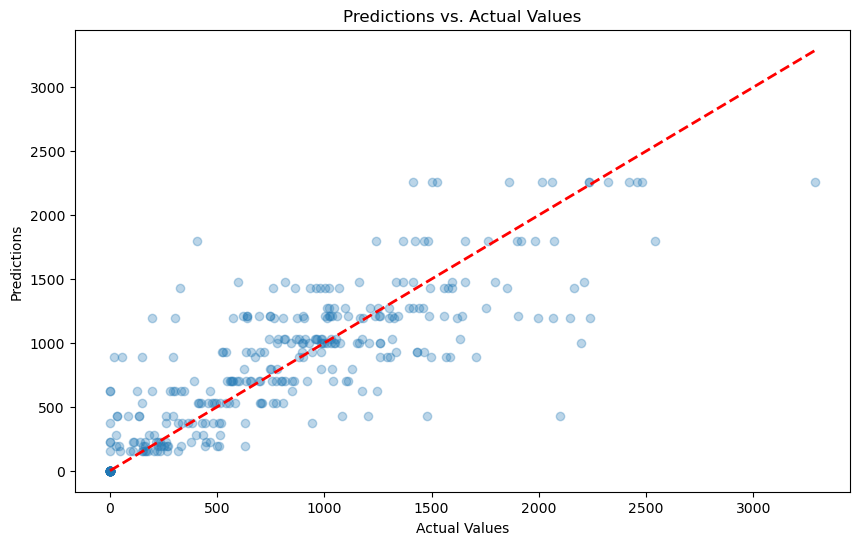

In [128]:
import matplotlib.pyplot as plt

# Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Actual Values')
plt.show()

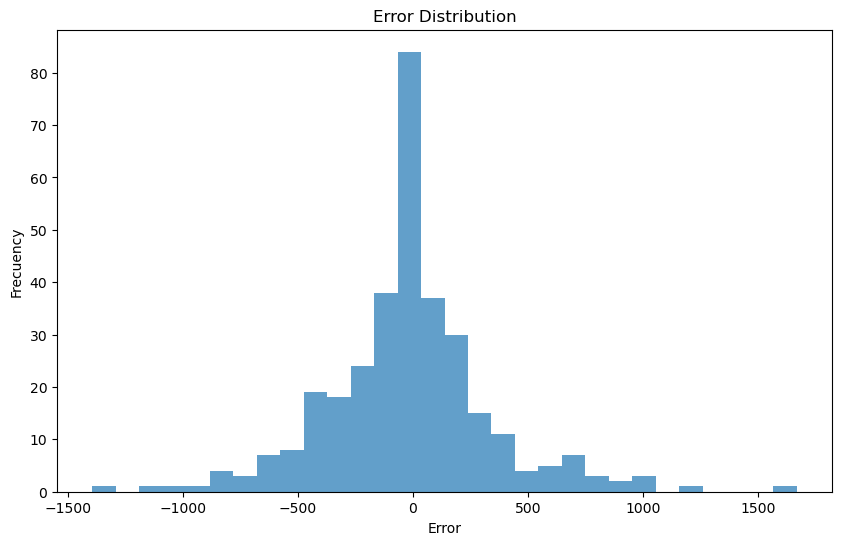

In [129]:
# Error calculation
error = y_test -model_pred

# Histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(error, bins=30, alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frecuency')
plt.title('Error Distribution')
plt.show()

# Preparing Submission File for Kaggle

In [130]:
#removing the column from kaggle_data which is not necessary for testing 
kaggle_data.drop(columns=['RENTALS',"Visibility(miles)",'season_Winter','Rainfall(in)','Snowfall(in)','is_weekend_1'],
                 axis=1,
                inplace=True)
                 

In [131]:
kaggle_data.head()

,Temperature(F),Humidity(%),Wind speed (mph),DewPointTemperature(F),SolarRadiation(MJ/m2),Hour,Comfortweather,Feel_like_temp,heat_index,Holiday_Yes,FunctioningDay_Yes,Peakhour_1,precipitation_1
ID,,,,,,,,,,,,,
mb_382,73,70,5.6,65.7,0.00,20,0.705275,22.005648,75.136744,False,True,False,False
mb_547,63,39,2.2,39.0,0.21,17,0.465348,13.572141,79.462908,False,True,True,False
mb_578,69,54,0.2,48.6,0.00,0,0.592161,18.568190,76.767661,False,True,False,False
mb_187,69,43,4.0,46.9,0.26,17,0.539780,16.854150,77.241958,True,True,True,False
mb_227,75,73,6.9,64.2,2.28,9,0.738022,22.659261,76.391665,False,True,False,False


In [132]:
separate_df_scaled = scaler.transform(kaggle_data)  # Assuming 'separate_df' has been appropriately preprocessed

# 2. Use the trained model to make predictions
predictions = model.predict(separate_df_scaled)

## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)


#!######################!#
#!# name the .csv file #!#
#!######################!#

# sending predictions to .csv
model_pred_df.to_csv(path_or_buf = "./model_output/kaggle_result_final.csv",
                     index       = True,
                     index_label = 'ID')